# Isolation Forest Examples

<img src="img/IsolationForest2.png" align="center" width="500" height="600">

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D

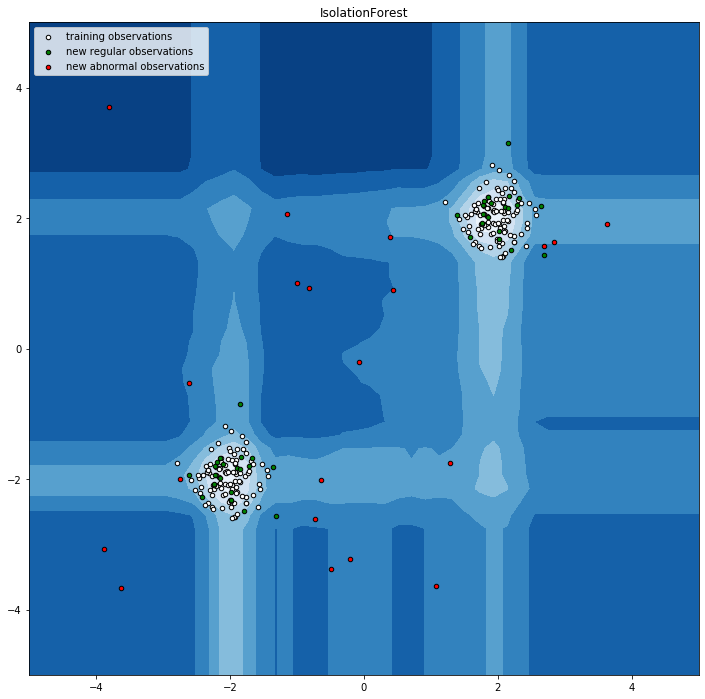

In [7]:
# Example 1

plt.figure(figsize=(12,12))

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2] # concatenate arrays quickly
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations",
            "new abnormal observations"],
           loc="upper left")
plt.show()

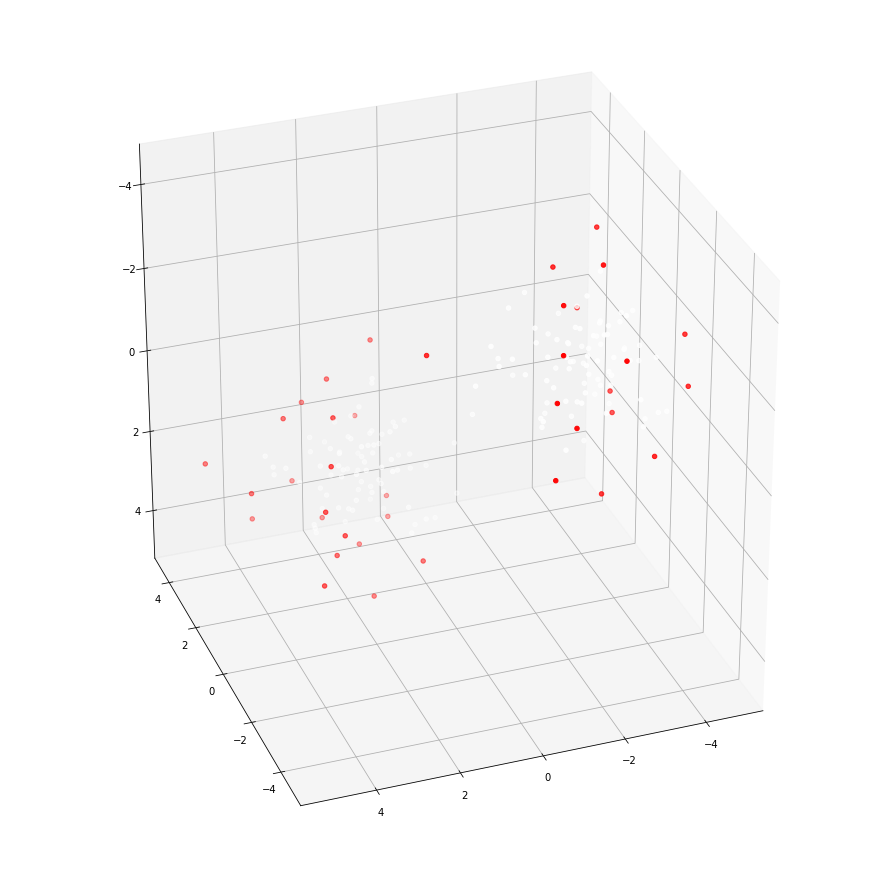

In [8]:
# Example 2

plt.figure(figsize=(12,12))

# 3D Isolation Forest Test
model = IsolationForest()

X = rng.randn(100, 3) # random creation of 3D array with normal distribution
X_train = np.r_[X + 2, X - 2]
X_hzrd = rng.uniform(low=-5, high=4, size=(20, 2))

model.fit(X_train)
y_pred_train = model.predict(X_train)

fig = plt.figure(1, figsize=(12, 10))
ax = Axes3D(fig, elev=-150, azim=110)

z = []

def nparrays(x):
    for i in x:
        if i == 1:
            z.append('white')
        else:
            z.append('red')
            
nparrays(y_pred_train)

z = np.array(z)
z.ravel()         
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=z, cmap=plt.cm.rainbow)

<img src="img/isolation_forest_1.png" align="center" >